# 张量运算
## 逐元素运算
rule 运算和 加法 都是逐元素（element-wise）运算，即该运算独立地应用于张量中的每个元素。
### rule 运算的简单实现

In [29]:
import numpy as np


def sugar_rule(x: np.ndarray):
    assert len(x.shape) == 2  #x 是一个 Numpy的2D张量
    res = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            res[i, j] = max(x[i, j], 0)
    return res


v = np.array([[1, 3], [4, -1]])
print("sugar_rule")
res1 = sugar_rule(v)
print(res1)
print("numpy rule:")
print(np.maximum(v, 0))


sugar_rule
[[1 3]
 [4 0]]
numpy rule:
[[1 3]
 [4 0]]


### 加法的简单实现

In [30]:
def sugar_add(x: np.ndarray, y: np.ndarray):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    res = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            res[i, j] += y[i, j]
    return res


a = np.array([[1, 3], [4, -1]])
b = np.array([[1, 5], [7, 9]])
print("sugar_add:")
print(sugar_add(a, b))
print("numpy add :")
print(a + b)

sugar_add:
[[ 2  8]
 [11  8]]
numpy add :
[[ 2  8]
 [11  8]]


### 广播
在👆的例子中，add是两个形状相同的张量相加，如何两个形状不同的张量相加：
如果没有歧义的话，较小的张量会被广播，以匹配较大张量的形状。广播包含以下两步。
+ 向较小的张量添加轴，使其ndim与较大的张量相同。
+ 将较小的张量沿着新轴重复，使其形状与较大的张量相同。

一个例子：
假设X的形状是（32，10），y的形状是（10,）。首先，给y添加空的第一个轴，
这样y的形状为变为（1，10）。然后，将y沿着新轴重复32次，
这样我们将 y 沿着新轴重复 32 次，这样得到的张量 Y 的形状为 (32, 10)，
并且 Y[i, :] == y for i in range(0, 32)。现在，我们可以将 X 和 Y 相加，
因为它们的形状相同。

简单的代码示例：

In [31]:
def sugar_add_matrix_and_vector(x_max: np.ndarray, y_min: np.ndarray):
    assert len(x_max.shape) == 2
    assert len(y_min.shape) == 1
    assert x_max.shape[1] == y_min.shape[0]
    res = x_max.copy()
    for i in range(x_max.shape[0]):
        for j in range(x_max.shape[1]):
            res[i, j] += y_min[j]
    return res


x = np.array([[1, 2], [3, 4]])
y = np.array([3, 3])
print(sugar_add_matrix_and_vector(x, y))

[[4 5]
 [6 7]]


如果一个张量的形状是 (a, b, ... n, n+1, ... m)，另一个张量的形状是 (n, n+1,... m)，那么通常可以利用广播对它们做两个张量之间的逐元素运算。广播操作会自动应用于从 a 到 n-1 的轴。
下面这个例子利用广播将逐元素的 maximum 运算应用于两个形状不同的张量。

In [32]:
x1 = np.random.random((65, 1, 2, 3))
y1 = np.random.random((2, 3))
z = np.maximum(x1, y1)
print(z.shape)

(65, 1, 2, 3)


## 张量点积
点积运算，也叫张量积（tensor product，不要与逐元素的乘积弄混），是最常见也最有用的
张量运算。与逐元素的运算不同，它将输入张量的元素合并在一起。
在 Numpy、Keras、Theano 和 TensorFlow 中，都是用 * 实现逐元素乘积。TensorFlow 中的
点积使用了不同的语法，但在 Numpy 和 Keras 中，都是用标准的 dot 运算符来实现点积。

In [33]:
# 向量的点积运算
def sugar_vector_dot(x: np.ndarray, y: np.ndarray):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]

    res = 0
    for i in range(x.shape[0]):
        res += x[i] * y[i]

    return res


x1 = np.array([4, 5])
y1 = np.array([7, 8])
print(sugar_vector_dot(x1, y1))

68


向量的点积运算是一个标量，只有元素个数相同的向量之间才能做点积。


In [40]:
# 向量和矩阵的点积运算
def sugar_matrix_vector_dot(x: np.ndarray, y: np.ndarray):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    # 矩阵的第一维必须和向量的第0维大小相等
    assert x.shape[1] == y.shape[0]

    #这个运算防护一个全是0的向量
    res = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            res += x[i, j] * y[j]

    return res


x1 = np.array([[1, 2], [4, 5], [5, 8]])
y1 = np.array([4, 3])
print(sugar_matrix_vector_dot(x1, y1))

[85. 85. 85.]


两个矩阵的点积运算
对于两个矩阵 x 和 y，当且仅当 x.shape[1] == y.shape[0] 时才可以进行矩阵点积运算，得到的结果是一个形状为 (x.shape[0], y.shape[1]) 的矩阵，其元素为 x
的行与 y 的列之间的点积。

In [50]:
def sugar_matrix_dot(x: np.ndarray, y: np.ndarray):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]

    # 返回一个特定形状的零矩阵
    res = np.zeros((x.shape[0], y.shape[1]))

    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            res[i, j] = sugar_vector_dot(row_x, column_y)

    return res


x1 = np.array([[1, 2, 3], [4, 5, 6]])
y1 = np.array([[7, 8], [9, 10], [11, 12]])
print(sugar_matrix_dot(x1, y1))

3
3
[[ 58.  64.]
 [139. 154.]]


矩阵点积的图解
![matrix_dot](https://cdn.jsdelivr.net/gh/mikusugar/PictureBed@master/uPic/2021/07/matrix_dot.png)

上图中x、y 和 z 都用矩形表示（元素按矩形排列）。x 的行和 y 的列必须大小相同，因
此 x 的宽度一定等于 y 的高度。

对于更高维度的张量
只要其形状匹配遵循与前面 2D 张量相同的

原则：

(a, b, c, d) . (d,) -> (a, b, c)

(a, b, c, d) . (d, e) -> (a, b, c, e)
以此类推。

## 张量变形
张量变形是指改变张量的行和列，以得到想要的形状。变形后的张量的元素总个数与初始张量相同，👇有一个简单的变形例子

In [55]:
x = np.array([[0, 1], [2, 3], [4, 5]])
print(x.shape)
x = x.reshape(2, 3)
print("####")
print(x)
print("####")
print(x.shape)

(3, 2)
####
[[0 1 2]
 [3 4 5]]
####
(2, 3)


一种特殊的张量变形是转置（transposition）。对矩阵做转置是指将行和列互换，使 x[i, :] 变为 x[:, i]


In [57]:
print(x)
print("####")
x = np.transpose(x)
print(x)
print("####")
print(x.shape)

[[0 3]
 [1 4]
 [2 5]]
####
[[0 1 2]
 [3 4 5]]
####
(2, 3)


## 张量运算的几何解释
对于张量运算所操作的张量，其元素可以被解释为某种几何空间内点的坐标，因此所有的张量运算都有几何解释。
举个加法的例子。
首先有这样一个向量 a=[0.5,1]


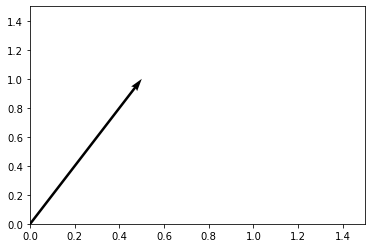

In [68]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
a = ax.quiver(0, 0, 0.5, 1, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([0, 1.5])
ax.set_ylim([0, 1.5])
plt.show()

假设又有一个点：b = [1, 0.25]，将它与前面的 A 相加。从几何上来看，这相当于将两
个向量箭头连在一起，得到的位置表示两个向量之和对应的向量


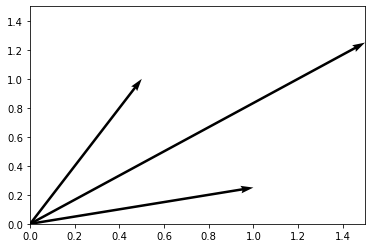

In [80]:
fig1, ax = plt.subplots()
c = np.array([0.5, 1]) + np.array([1, 0.25])
a1 = ax.quiver(0, 0, 0.5, 1, angles='xy', scale_units='xy', scale=1)
b1 = ax.quiver(0, 0, 1, 0.25, angles='xy', scale_units='xy', scale=1)
c1 = ax.quiver(0, 0, c[0], c[1], angles='xy', scale_units='xy', scale=1)
ax.set_xlim([0, 1.5])
ax.set_ylim([0, 1.5])
plt.show()

